# Exploratory data analysis

In [1]:
from utils import hdf5_handler
import numpy as np

2024-05-26 23:06:35.462138: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-26 23:06:35.486805: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 23:06:35.563825: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-26 23:06:35.681603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-26 23:06:49.429716: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
data = hdf5_handler(bytes("./data/abide.hdf5", encoding="utf8"), 'a')

In [3]:
data.keys()

<KeysViewHDF5 ['experiments', 'patients']>

In [4]:
data["experiments"].keys()

<KeysViewHDF5 ['aal_whole', 'cc200_whole', 'ez_whole']>

In [7]:
data["experiments"]["aal_whole"].keys()

<KeysViewHDF5 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']>

In [3]:
x_wo_nyu = np.load("X_sub_without_NYU.npy")
y_wo_nyu = np.load("y_sub_without_NYU.npy")

In [4]:
x_wo_nyu.shape, y_wo_nyu.shape

((146, 6672), (146,))

# Subset quality analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np

X_all=np.load(r'C:/Users/lxh/Desktop/data/X_all.npy')
print(X_all.shape)
X_all_age=X_all[:,-1:].reshape(-1)
#X_all_age=random.sample(list(X_all_age),175)
#X_all_age=np.asarray(X_all_age)
print(X_all_age.shape)
print(X_all_age.mean(),np.median(X_all_age))

X_sub_without_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_sub_without_NYU.npy')
print(X_sub_without_NYU.shape)
X_sub_without_NYU_age=X_sub_without_NYU[:,-1:].reshape(-1)
#X_sub_without_NYU_age=random.sample(list(X_sub_without_NYU_age),175)
#X_sub_without_NYU_age=np.asarray(X_sub_without_NYU_age)
print(X_sub_without_NYU_age.shape)
print(X_sub_without_NYU_age.mean(),np.median(X_sub_without_NYU_age))

X_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_NYU.npy')
print(X_NYU.shape)
X_NYU_age=X_NYU[:,-1:].reshape(-1)
print(X_NYU_age.shape)
print(X_NYU_age.mean(),np.median(X_NYU_age))


(1035, 19902)
(1035,)
16.953803671497585 14.53
(422, 19902)
(422,)
17.054876303317535 14.719999999999999
(175, 19902)
(175,)
15.261274285714286 13.583


3


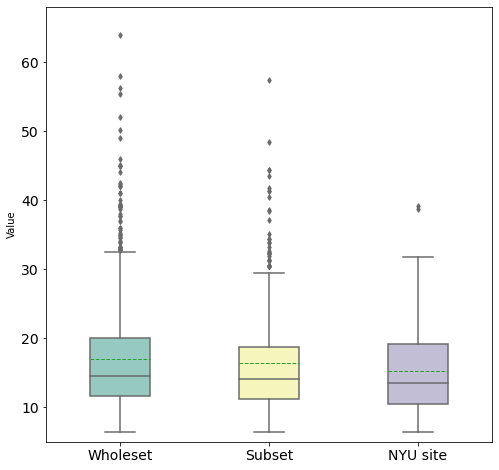

In [10]:
import seaborn as sns
import numpy as np


data = [X_all_age,X_sub_without_NYU_age-0.6,X_NYU_age]

print(len(data))
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=data, palette="Set3", width=0.4, fliersize=4,showmeans=True,meanline=True)

labels = ['Wholeset', 'Subset','NYU site']
plt.xticks(np.arange(len(labels)), labels)

ax.set_ylim(5, 68)
ax.set_ylabel('Value')

ax.tick_params(axis='both', which='major', labelsize=14, labelrotation=0)

plt.show()

In [ ]:
import seaborn as sns
import numpy as np


data = [X_all_age,X_sub_without_NYU_age,X_NYU_age]

fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=data, palette="Set3", width=0.4, fliersize=4,showmeans=True,meanline=True)

labels = ['Wholeset', 'Subset','NYU site']
plt.xticks(np.arange(len(labels)), labels)

ax.set_ylim(5, 68)
ax.set_ylabel('Value')

ax.tick_params(axis='both', which='major', labelsize=14, labelrotation=0)

plt.title('The boxplot for age distribution of three datasets.')
plt.show()

In [18]:
import numpy as np
#male 1
#female 2
male=[]
female=[]


X_sub_without_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_sub_without_NYU.npy')
print(X_sub_without_NYU.shape)
X_sub_without_NYU_s=X_sub_without_NYU[:,-2:-1].reshape(-1)
print(X_sub_without_NYU_s.shape)
print(np.sum(X_sub_without_NYU_s==1)/X_sub_without_NYU_s.shape[0])
male.append(np.sum(X_sub_without_NYU_s==1)/X_sub_without_NYU_s.shape[0])
female.append(1-np.sum(X_sub_without_NYU_s==1)/X_sub_without_NYU_s.shape[0])

X_all=np.load(r'C:/Users/lxh/Desktop/data/X_all.npy')
print(X_all.shape)
X_all_s=X_all[:,-2:-1].reshape(-1)
print(X_all_s.shape)
print(np.sum(X_all_s==1)/X_all_s.shape[0])
male.append(np.sum(X_all_s==1)/X_all_s.shape[0])
female.append(1-np.sum(X_all_s==1)/X_all_s.shape[0])

X_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_NYU.npy')
print(X_NYU.shape)
X_NYU_s=X_NYU[:,-2:-1].reshape(-1)
print(X_NYU_s.shape)
print(np.sum(X_NYU_s==1)/X_NYU_s.shape[0])
male.append(np.sum(X_NYU_s==1)/X_NYU_s.shape[0])
female.append(1-np.sum(X_NYU_s==1)/X_NYU_s.shape[0])

(422, 19902)
(422,)
0.8791469194312796
(1035, 19902)
(1035,)
0.8483091787439614
(175, 19902)
(175,)
0.7942857142857143
[0.8791469194312796, 0.8483091787439614, 0.7942857142857143] [0.12085308056872035, 0.1516908212560386, 0.20571428571428574]


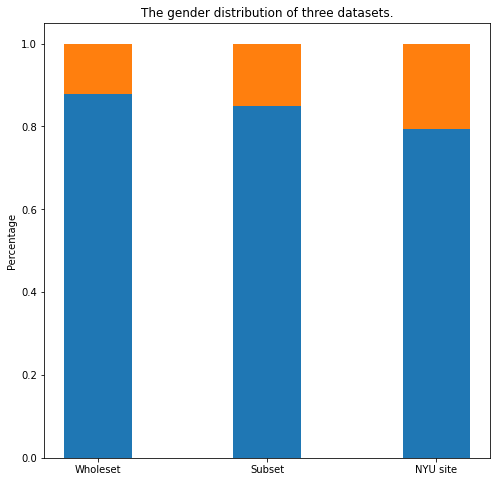

In [19]:
import numpy as np
import matplotlib.pyplot as plt


labels = ['Wholeset', 'Subset','NYU site']

fig, ax = plt.subplots(figsize=(8, 8))
ax.bar(labels, np.array(male), label='Male',width=0.4)
ax.bar(labels, np.array(female), bottom=male, label='Female',width=0.4)

#ax.legend(loc='upper right',bbox_to_anchor=(1.2, 0.8))
ax.set_title('The gender distribution of three datasets.')
ax.set_ylabel('Percentage')

plt.show()


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import random

X_all=np.load(r'C:/Users/lxh/Desktop/data/X_all.npy')
yall=np.load(r'C:/Users/lxh/Desktop/data/y_all.npy')
Xall=X_all[:,:-2]
print(Xall.shape)
print(yall.shape)


X_sub_without_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_sub_without_NYU.npy')
y_without_NYU=np.load(r'C:/Users/lxh/Desktop/data/y_sub_without_NYU.npy')
without_NYU=X_sub_without_NYU[:,:-2]
print(without_NYU.shape)
print(y_without_NYU.shape)


X_NYU=np.load(r'C:/Users/lxh/Desktop/data/X_NYU.npy')
y_NYU=np.load(r'C:/Users/lxh/Desktop/data/y_NYU.npy')
NYU=X_NYU[:,:-2]
print(NYU.shape)
print(y_NYU.shape)

(1035, 19900)
(1035,)
(422, 19900)
(422,)
(175, 19900)
(175,)


In [15]:
from sklearn.feature_selection import SelectKBest,f_classif

Xall=SelectKBest(f_classif,k=3000).fit_transform(Xall, yall)
print(Xall.shape)

without_NYU_=SelectKBest(f_classif,k=3000)

without_NYU=without_NYU_.fit_transform(without_NYU, y_without_NYU)
index=without_NYU_.get_support()
print(without_NYU.shape)

NYU=SelectKBest(f_classif,k=3000).fit_transform(NYU, y_NYU)
print(NYU.shape)

(1035, 3000)
(422, 3000)
(175, 3000)


(75, 3000) (417, 3000)


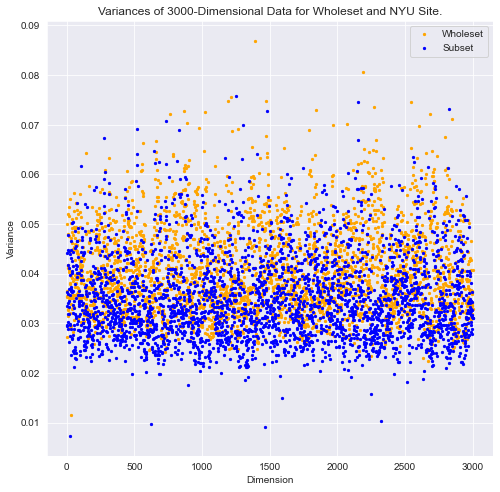

In [81]:
import numpy as np
import matplotlib.pyplot as plt

data = NYU[y_NYU==0]
data2=Xall[yall==0]
data3=without_NYU[y_without_NYU==0]

print(data.shape,data3.shape)

variances = np.var(data, axis=0)
variances2 = np.var(data2, axis=0)
variances3 = np.var(data3, axis=0)


fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(range(1, 3001), variances,color='red', s=5,label='NYU site')
ax.scatter(range(1, 3001), variances2,color='orange', s=5,label='Wholeset')
ax.scatter(range(1, 3001), variances3,color='blue', s=5,label='Subset')


ax.set_title('Variances of 3000-Dimensional Data for Wholeset and NYU Site.')
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance')

ax.legend()

plt.show()

# ROI visualisation

In [4]:
aa=np.array(range(len(index)))
index_selected=aa[index]
index_selected

array([    1,     5,    10, ..., 19878, 19882, 19893])

In [5]:
import numpy as np
import collections
index_ori=np.array([(i,j) for i in range(200) for j in range(200)]).reshape((-1,200,2))
index_2_selected=index_ori[((np.tri(200,k=-1)-1)*-1) ==1][index_selected]
np.unique(index_2_selected)
index_2_selected=index_2_selected.reshape(-1)
index_x=list(collections.Counter(index_2_selected).items())
#index_y=list(collections.Counter(index_2_selected[:,1]).items())
index_x.sort(key=lambda x:x[1],reverse=True)
#index_y.sort(key=lambda x:x[1],reverse=True)
xs=np.array(index_x[:100])[:,0]

In [7]:
import pandas as pd
df=pd.read_csv("CC200_ROI_labels.csv")
df.head()
df.iloc[xs,2].values[0]
xc=[]
yc=[]
zc=[]
for i in df.iloc[xs,2].values:
    x,y,z=i[2:-1].split(";")
    xc.append(float(x))
    yc.append(float(y))
    zc.append(float(z))

xc=np.around(xc)
yc=np.around(yc)
zc=np.around(zc)

In [8]:
center=np.array([xc,yc,zc]).T

In [9]:
center=center+np.array([88,128,128])

In [10]:
center

array([[ 51.,  57.,  96.],
       [ 79.,  90., 197.],
       [ 90.,  90., 160.],
       [ 31.,  80., 137.],
       [118., 153., 113.],
       [143.,  99., 128.],
       [ 69.,  66., 102.],
       [131.,  73.,  96.],
       [101.,  64., 152.],
       [ 71.,  47.,  97.],
       [151.,  85., 120.],
       [144.,  98., 172.],
       [116., 186., 126.],
       [ 29.,  98., 126.],
       [ 44., 161., 120.],
       [106.,  38., 151.],
       [142., 116., 167.],
       [ 88., 144., 160.],
       [ 71., 112., 198.],
       [132., 129., 178.],
       [ 63., 180., 151.],
       [ 43., 127., 113.],
       [144., 132., 134.],
       [ 54.,  47., 154.],
       [100., 108., 138.],
       [ 62., 140., 184.],
       [ 60.,  70., 114.],
       [124.,  55.,  97.],
       [132., 138.,  92.],
       [ 37., 124.,  99.],
       [117., 163., 170.],
       [125., 145., 132.],
       [ 62.,  35., 140.],
       [ 90.,  71., 115.],
       [ 90., 112., 163.],
       [ 89., 184., 121.],
       [119., 127.,  92.],
 

In [56]:
import numpy as np
import nibabel as nib
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

image_path1 = '.\Desktop\\fmri\\test\\ABIDE_50002_MRI_MP-RAGE_br_raw_20120830172854796_S164623_I328631.nii'
image_obj1 = nib.load(image_path1)
print(f'Type of the image {type(image_obj1)}')
image_data1 = image_obj1.get_fdata()
type(image_data1)
print(image_data1.shape)
#height1, width1, depth1 = image_data1.shape
#print(f"The image object height: {height1}, width:{width1}, depth:{depth1}")
print(f'image value range: [{image_data1.min()}, {image_data1.max()}]')
print(image_obj1.header)

Type of the image <class 'nibabel.nifti1.Nifti1Image'>
(176, 256, 256)
image value range: [0.0, 1138.0]
<class 'nibabel.nifti1.Nifti1Header'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'50002'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 176 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         1.0500001  1.0507812  1.0507812  0.         0.
  0.         0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b     

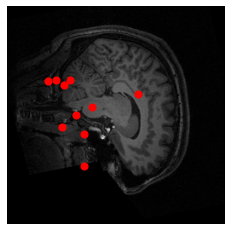

In [27]:
plt.imshow(image_data1[80,:,:],cmap='gray')
plt.axis('off')   # 去坐标轴
plt.xticks([])    # 去 x 轴刻度
plt.yticks([]) 
plt.scatter(center[:10,1],center[:10,2]-10,s=50,c="r")

plt.savefig('preprocess_fmri_NYU_x.jpg',bbox_inches='tight', pad_inches=0)
plt.show()

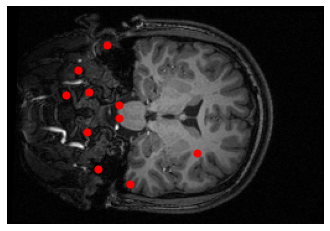

In [29]:
plt.imshow(image_data1[:,128,:],cmap='gray')
plt.axis('off')   # 去坐标轴
plt.xticks([])    # 去 x 轴刻度
plt.yticks([]) 
plt.scatter(center[:10,1],center[:10,0],s=50,c="r")

plt.savefig('preprocess_fmri_NYU_y.jpg',bbox_inches='tight', pad_inches=0)

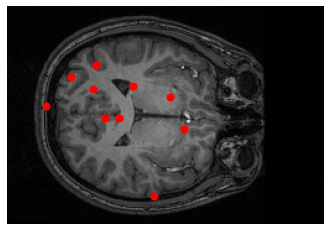

In [28]:
plt.imshow(image_data1[:,:,128],cmap='gray')
plt.axis('off')   # 去坐标轴
plt.xticks([])    # 去 x 轴刻度
plt.yticks([]) 
plt.scatter(center[:10,0],center[:10,1],s=50,c="r")

plt.savefig('preprocess_fmri_NYU_z.jpg',bbox_inches='tight', pad_inches=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map, show

In [ ]:
haxby_dataset = datasets.fetch_haxby()
mask_filename = haxby_dataset.mask_vt
fmri_filename = haxby_dataset.func[0]
print(haxby_dataset.session_target[0])
labels = np.loadtxt(haxby_dataset.session_target[0],dtype='str')
labels=labels[1:,1]
print(labels)


masker = NiftiMasker(mask_strategy='epi', standardize=True)
fmri_masked = masker.fit_transform(fmri_filename)
from sklearn.feature_selection import f_classif
f_values, p_values = f_classif(fmri_masked, labels)
f_threshold = np.percentile(f_values, 95)
sig_indices = np.where(f_values > f_threshold)[0]

# 绘制显著性图
sig_mask = masker.inverse_transform(np.zeros((fmri_masked.shape[1],), dtype=bool))
sig_mask.get_fdata()[masker.mask_img_.get_fdata() != 0] = f_values > f_threshold
plot_stat_map(sig_mask, bg_img=haxby_dataset.anat[0], threshold=0.5,
              display_mode='z', cut_coords=[-12, -6, 0, 6, 12],
              cmap=plt.cm.RdBu_r)
plt.show()
